###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license. (c)2014 Lorena A. Barba, Pi-Yueh Chuang. Thanks: NSF for support via CAREER award #1149784.

# Source Distribution on an Airfoil

In [Lesson 3](03_Lesson03_doublet.ipynb) of *AeroPython*, you learned that it is possible to represent potential flow around a circular cylinder using the superposition of a doublet singularity and a free stream. But potential flow is even more powerful: you can represent the flow around *any* shape. How is it possible, you might ask?

For non-lifting bodies, you can use a source distribution on the body surface, superposed with a free stream. In this assignment, you will build the flow around a NACA0012 airfoil, using a set of sources.

Before you start, take a moment to think: in flow around a symmetric airfoil at $0^{\circ}$ angle of attack,

* Where is the point of maximum pressure?
* What do we call that point?
* Will the airfoil generate any lift?

At the end of this assignment, come back to these questions, and see if it all makes sense.

## Problem Setup

You will read data files containing information about the location and the strength of a set of sources located on the surface of a NACA0012 airfoil. 

There are three data files: NACA0012_x.txt, NACA0012_y.txt, and NACA0012_sigma.txt. To load each file into a NumPy array, you need the function [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). The files should be found in the `resources` folder of the `lessons`. 

Using 51 mesh points in each direction, and a domain $[-1, 2]\times[-0.5, 0.5]$, compute the velocity due to the set of sources plus a free stream in the $x$-direction with $U_{\infty}=1$. Also compute the coefficient of pressure on your grid points.

## Questions:

1. What is the value of maximum pressure coefficient, $C_p$?
2. What are the array indices for the maximum value of $C_p$?

Make the following plots to visualize and inspect the resulting flow pattern:

* Stream lines in the domain and the profile of our NACA0012 airfoil, in one plot
* Distribution of the pressure coefficient and a single marker on the location of the maximum pressure

**Hint**: You might use the following NumPy functions: [`numpy.unravel_index`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.unravel_index.html) and [`numpy.argmax`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)

##### Think

1. Do the stream lines look like you expected?
2. What does the distribution of pressure tell you about lift generated by the airfoil?
3. Does the location of the point of maximum pressure seem right to you?

In [1]:
cd 

C:\Users\Paulina


In [2]:
cd Desktop\PausWorld\MAE_6226\AeroPython\lessons\resources

C:\Users\Paulina\Desktop\PausWorld\MAE_6226\AeroPython\lessons\resources


In [3]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline

In [4]:
############### Functions ###################
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [5]:
# Store Data - source points 
sources_x = numpy.loadtxt(fname='NACA0012_x.txt')  # x-position of source points
sources_y = numpy.loadtxt(fname='NACA0012_y.txt')  # y-position of source points 
sources_sigma = numpy.loadtxt(fname='NACA0012_sigma.txt') # source point strength

# Create grid w/ 51 mesh points in each direction  
N = 51                                # number of points in each direction
x_start, x_end = -1.0, 2.0            # boundaries in the x-direction
y_start, y_end = -0.5, 0.5            # boundaries in the y-direction
x = numpy.linspace(x_start, x_end, N) # creates a 1D-array with the x-coordinates
y = numpy.linspace(y_start, y_end, N) # creates a 1D-array with the y-coordinates
X, Y = numpy.meshgrid(x, y)           # generates a mesh grid

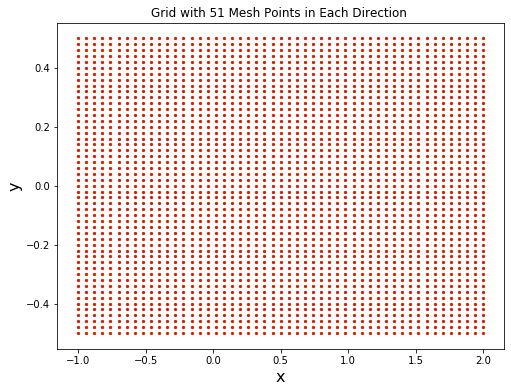

In [154]:
# plot the grid of points only to check grid
pyplot.figure(figsize=(8.0, 6.0))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('Grid with 51 Mesh Points in Each Direction ')
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o')

In [7]:
u_inf = 1.0        # freestream speed

###### Freestream #########
u_freestream = u_inf * numpy.ones((N, N), dtype=float)  # compute the freestream velocity field
v_freestream = numpy.zeros((N, N), dtype=float)         # compute the freestream velocity field
psi_freestream = u_inf * Y                              # compute the stream-function

###### Add all velocities & streamlines to combine freestreams & sources solutions by superposition #########
# Initialize u,v,psi w/ freestream values
u = u_freestream    # Initialize u w/ freestream and will add to this the sources
v = v_freestream    # Initialize v w/ freestream and will add to this the sources
psi = psi_freestream

# Add all sources to the initialized u,v,psi 
i = 0
for item in sources_sigma:
    strength_source = sources_sigma[i]            # strength of the source
    x_source, y_source = sources_x[i], sources_y[i]   # location of the source
    # compute the velocity field
    u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)
    # compute the stream-function
    psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)
    u += u_source
    v += v_source
    psi += psi_source
    i+=1
    
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

In [94]:
# To find max and location of max
max_current = 0.0
j,k = 0, 0
for item_1 in cp:
    k = 0
    for item_2 in item_1:
        if item_2 > max_current:
            max_current= item_2
            x_cp_index, y_cp_index = j, k
        k +=1
    j +=1   

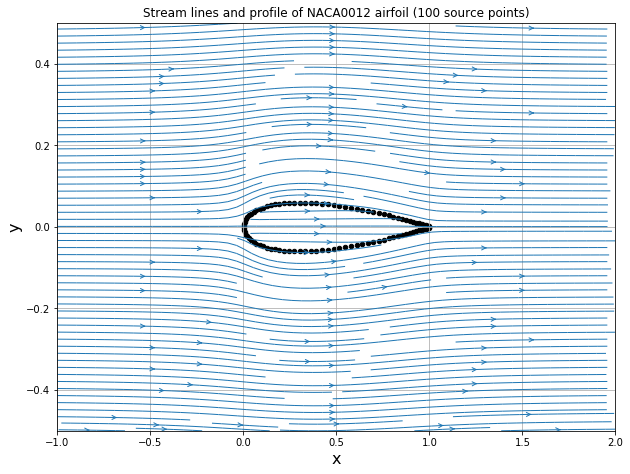

In [121]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width*2.25
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.title('Stream lines and profile of NACA0012 airfoil (100 source points)')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(sources_x, sources_y, color='black', s=20, marker='o')

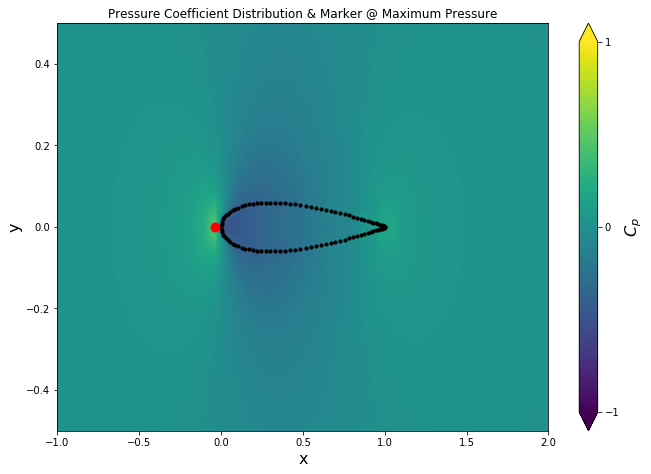

In [122]:
# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width*2.25
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('Pressure Coefficient Distribution & Marker @ Maximum Pressure')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])
pyplot.scatter(sources_x, sources_y, color='black', s=10, marker='o')
pyplot.scatter(X[x_cp_index][y_cp_index], Y[x_cp_index][y_cp_index], color='red', s=80, marker='o')

In [123]:
print('max_cp = ', max_current, 
      '\n x_cp_index = ', x_cp_index, 
      '\n y_cp_index = ', y_cp_index)

max_cp =  0.4714436613316235 
 x_cp_index =  25 
 y_cp_index =  16


In [150]:
# Sum of all source strengths (NACA0012_sigma.txt)
sum_sigma = 0.0
for item in sources_sigma:
    sum_sigma +=item
# Sum of the magnitude of the strengths (sum of squares or sum of absolute value)
sum_sigma_magn = 0.0
for item in sources_sigma:
    sum_sigma_magn += numpy.abs(item)  

sum_sigma_magn_2 = 0.0
for item in sources_sigma:
    sum_sigma_magn_2 += numpy.abs(item**2)
# Ratio of the first number to the second
ratio_sigma = sum_sigma/sum_sigma_magn
ratio_sigma_2 = sum_sigma/sum_sigma_magn_2
# Discuss this result.  

In [151]:
ratio_sigma

0.005363344722312381

In [152]:
ratio_sigma_2

1.3789701323010606

### Questions To Answer: 
* What is the value of maximum pressure coefficient,  𝐶𝑝 ?
    * <span style="color:blue">$𝐶𝑝 = 0.4714436613316235$</span>
* What are the array indices for the maximum value of  𝐶𝑝 ?
    * <span style="color:blue">$x_{cp\_index} = 25, y_{cp\_index} = 16$</span>
* Make the following plots to visualize and inspect the resulting flow pattern:
    * <span style="color:blue">Stream lines in the domain and the profile of our NACA0012 airfoil, in one plot</span>
    * <span style="color:blue">Distribution of the pressure coefficient and a single marker on the location of the maximum pressure</span>


### Revisit: 
* Where is the point of maximum pressure? 
    * <span style="color:blue">Directly infront of the airfoil tip. </span>
* What do we call that point?
    * <span style="color:blue">The stagnation point</span>
* Will the airfoil generate any lift?
    * <span style="color:blue">No, since symmetric and 0 degree angle of attack</span>

### Think:
* Do the stream lines look like you expected?
    * <span style="color:blue">Yes, they curve around the airfoil</span>
* What does the distribution of pressure tell you about lift generated by the airfoil?
    * <span style="color:blue">There is a relationship between velocitym, pressure, and shape of airfoil</span>
* Does the location of the point of maximum pressure seem right to you?
    * <span style="color:blue">Yes</span>
### Problem # 4 (One Other Thing)
* Discuss the ratio of the first number(sum of sigma) to the second (sum of magnitudes)
    * $ ratio_{\sigma} = 0.00536$   (if sum of magnitudes are $|x_1|+|x_2|+...$)
    * $ ratio_{\sigma_2} = 1.37897$   (if sum of magnitudes are $x_1^{2}+x_2^{2}+...$)
    * Since the ratio is greater than $0$ then this is a source. 


In [86]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../../styles/custom.css')